# Interpreting Subreddit Post Sentiments for Genshin Impact Rerun Characters
## MACS 40400 Project Yawei Li

## Introduction

In Genshin impact subreddit, why do sentiments on posts about a limited-time-only character drop after their resale?

Genshin Impact (GI) is a multiplatform, open world game made by a Chinese company Mihoyo in 2020, and has gained global popularity since its release. In 2021, it ranked the 1st in US top-selling games and has won best mobile game of the year. The game is set in a fictional world Teyvat, players can freely explore and combat everywhere using a team of four characters from the game's 40+ uniquely designed characters each offering stories and playstyles.

To obtain a character, a player have to either farm primogem (premium currency) or pay real money to purchase primogems. Primogems are then spent in the games lottery system (called "Wish"), where the reward has a chance to be the character. Either way, to obtain (or skip a character and save for next) a character is a hefty investment. On average, getting one character costs ~50 days of active playing for 20 minutes per day, or ~$150 to purchase the needed primogems.

While some characters always have a chance to appear in Wish, most sought-after characters are only available in the Wish system for a limited time period (usually 3 weeks). We call those 'limited characters' and the Wishes to obtain them "Banners". Pediodically, limited characters are up for "rerun", meaning to be available in the gamble system again for 3 weeks, and the company would boost sales creating hype and by releasing challenges suitable for that rerun character. Typical reruns happen 6-12 months after a character's debut.

Genshin Impact subreddit is one of the biggest GI communities with 1.4 million followers. Then, it would be common sense to believe that when a character finally gets its rerun, sentiments on posts about him/her will remain high as players are excited about finally getting the character they've been waiting for (missed on first release/ joined after first release).

However, my sentiments data speaks otherwise. Sentiments on posts about rerun characters tend to drop down after an initial peak and sometimes even lower than previous levels. Below I would first identify this subreddit post sentiment pattern, then I analyzed its cause and interpreted with social science theories. 


## Identification

### Reddit Posts as Culture among GI Players

I argue that posting on Reddit about their gameplay experience (with certain character) has become cultural or conventional among r/Genshin_impact subreddit users. Here, "culture" means the posts themselves and the actions and patterns of posting.

The sign-vehicle here is the GI subreddit posts. These posts are replicas of a legisign of GI subreddit user community because: (1) Players are usually willing to share their gameplay experience onto Reddit even though there's no formal rule or obligations.(2) Together, GI subreddit users created a large volume of posts rich with content. We are identifying tendencies and analyzing topics of this existing culture. Therefore, we can see posting as general law for GI subreddit users.

These posts are iconic to the object, as their posts usually describe their experience. They can also be indexical, pointing towards certain characters or gameplay features. The relationship between sign-vehicle and interpretant is context dependant, but mostly dicentic or argumentative, because the interpretant is constantly 'I want to share this ... (post content) to fellow GI players', and sometimes to further argue 'I'm so lucky/unlucky' or 'Xiao is such a cool character' etc. 

### Data

Obviously, this pattern needs Reddit data to identify. In specific, the project uses text data from GI subreddit posts titles and body.  However, I initially identified such patterns on Chinese GI forums. Since Chinese corpus is much harder to analyze and to interpret for English speaking audience, I choose to change question/data source to Reddit, and have found similar patterns.

I gathered said data using Pushshift API (third party API for Reddit data) and 'psaw',an API wrapper for Pushshift.

I collect data by character. For each limited character, I collect all posts found with Pushshift search. In addition to title and text, I also collected post date, statistics (upvotes, number of comments) and link to media/website if there's one. They may come useful in further work. I also collected character rerun periods for each character that has had an rerun.

In total, there's 74616 posts about 18 limited characters. The dates range from May 21,2021 (a month before a major update) to March 5, 2022.

In [11]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nlp
import matplotlib.pyplot as plt
from gensim import corpora, models
import music
import time
from textblob import TextBlob

In [4]:
# Loading data
# The gathering, cleaning and preprocessing is skipped here. They can be found in other notebooks.
data = pd.read_pickle('datafull.pkl')

In [5]:
data.shape

(74616, 16)

Meanings of some columns:
- created_utc: UTC time when post was submitted
- selftext: Text from post body. Some posts may not have it. In GI subreddit, it's usually artworks.
- stext, stitle: Vader sentiment compound scores for selftext and title.
- rrstart, rrend, rrstatus: rerun time start and end for that character, and whether the post is before or after rerun.

In [6]:
data.head()

,created_utc,id,media_only,num_comments,score,selftext,title,url,character,fulltext,flemmas,rrstart,rrend,rrstatus,stext,stitle
0,2021-08-15 19:51:30,p50er9,False,194,1,Basically The opposite of this question: https...,What characters became one of your favorites a...,https://www.reddit.com/r/Genshin_Impact/commen...,Childe,What characters became one of your favorites a...,"[character, become, one, favorite, regret, get...",2021-10-13 02:00:00,2021-11-02 09:59:00,before,0.9869,-0.3182
1,2021-08-15 19:40:56,p507ys,False,20,1,Fighting Baal is 200% harder every time you ha...,Please Let us skip cutscenes,https://www.reddit.com/r/Genshin_Impact/commen...,Childe,Please Let us skip cutscenes Fighting Baal is ...,"[please, let, u, skip, cutscenes, fight, baal,...",2021-10-13 02:00:00,2021-11-02 09:59:00,before,-0.8412,0.3182
2,2021-08-15 11:30:39,p4rrn1,False,91,1,Each week I wonder if it's even worth doing th...,"Fellow day 1 players, do you still do weeklies...",https://www.reddit.com/r/Genshin_Impact/commen...,Childe,"Fellow day 1 players, do you still do weeklies...","[fellow, day, 1, player, still, weekly, every,...",2021-10-13 02:00:00,2021-11-02 09:59:00,before,-0.7667,0.0000
3,2021-08-15 08:10:13,p4pkjv,False,3,1,,genderbent zhongli and childe,https://i.redd.it/peivdqqw9hh71.png,Childe,genderbent zhongli and childe,"[genderbent, zhongli, childe]",2021-10-13 02:00:00,2021-11-02 09:59:00,before,0.0000,0.0000
4,2021-08-15 04:41:13,p4n24a,False,141,1,,Childe gets what he deserves,https://v.redd.it/mi4n83xzagh71,Childe,Childe gets what he deserves,"[childe, get, deserves]",2021-10-13 02:00:00,2021-11-02 09:59:00,before,0.0000,0.0000


### Sentiment Analysis and Trend Identification

Below I demonstrate that the sentiment will rise then drop when a character goes on rerun. I only used post titles to demonstrate this trend because:

(1) Both TextBlob and Vader performs poorly on post body, according to my preliminary analysis and assignment 2. They often give wrong scores and contradicts each other. In comparison, they tend to agree on title.

(2) A good amount of posts do not have body text.

Body text will be put into good use in interpretation section.

In [27]:
data['btexts'] = data['selftext'].apply(lambda x: TextBlob(x).sentiment[0]) #body text sentiment
data['btitles'] = data['title'].apply(lambda x: TextBlob(x).sentiment[0]) #title text sentiment

As can be seen, Vader sentiment scores has a higher variance, which I prefer over the more evenly ditributed TextBlob sentiment scores. I want more polarized results because we will be taking means of these sentiments which is heavily "watered down" by the overwhelming numbers of neutral posts. A more polarized result would help us identify the pattern better.

We'll therefore use Vader score from now on. Besides, Textblob's very positive posts seem problematic.

Text(0.5, 0, 'Vader')

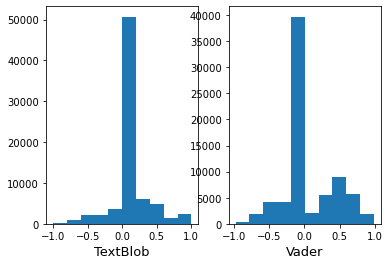

In [117]:
#Comparing Vader and TextBlob title sentiment results
f,(ax1, ax2) = plt.subplots(1,2)
ax1.hist(data.btitles)
ax1.set_xlabel('TextBlob',fontsize = 13)
ax2.hist(data.stitle)
ax2.set_xlabel('Vader',fontsize = 13)

As shown below, Textblob treats the word "best" as super positive, which usually isn't the case.

In [298]:
data[data.btitles > 0.9].title #Textblob's very positive post titles

73                                   Childe's best weapons
208      Here's who you voted as Best Girl &amp; Best Boy!
209                           What Bow is best for Childe?
223      Which weapon is the best for Tetzuyo? (Read De...
387           Wondering what would be best for Childe team
                               ...                        
74316                         best of luck for pulling Yae
74330                             Good Luck on Yae Pull!!!
74380    Yae Miko tasting something delicious (two images)
74571                     I found the best way to use Miko
74613                            Karp-komi and Fox Miko :D
Name: title, Length: 1612, dtype: object

Below are 5 title sentiment plots of all 8 characters that received a rerun in our time period. Character pairs rerun together (like Zhongli/Ganyu) are plotted together. Most of them followed this trend.

In Figure 1, displayed by blue plot is character Xiao's post title sentiment, averaged by week for clearer view with less daily noise/variance. Xiao's rerun lasted from Week 54 to Week 56, as marked by green dashed line in the picture. It can be seen that after peaking at week 56, sentiments dropped fast after the rerun was over. Shorter interpretations for the other plots are written in their title.

Text(0.5, 1.0, 'Figure 1 Character Xiao Post Title Sentiments by Week')

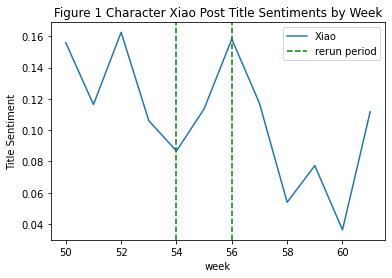

In [132]:
# Averaging sentiments by Week
# Our time period is week 1-9 in 2022 and week 20-52 in 2021, so we treat 2022 weeks as week 53 to 61
# for plotting. This method was also used in class for music decade.

def adjust_week(x):
    if x <= 9:
        return int(x + 52)
    else:
        return int(x)

# Average sentiment by character and by adjusted week no.
weeklychar = data.groupby([data.character,data.created_utc.dt.isocalendar().week.apply(adjust_week)]).mean()
# Plotting title Sentiments from TextBlob
weeklychar.loc['Xiao'].loc[50:].stitle.plot(label = 'Xiao')
plt.axvline(x = 54, color = 'green', linestyle = 'dashed',label = 'rerun period')
plt.axvline(x = 56, color = 'green', linestyle = 'dashed')
plt.ylabel('Title Sentiment')
plt.legend()
plt.title('Figure 1 Character Xiao Post Title Sentiments by Week')

Ganyu fits our pattern well. Zhongli didn't have the intial rise but the drop was expected.

Text(0.5, 1.0, 'Figure 2 Zhongli/Ganyu Rerun')

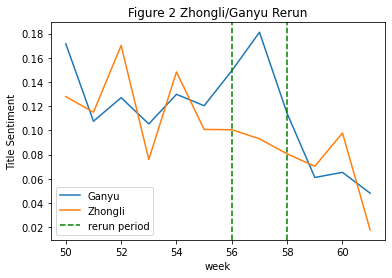

In [292]:
weeklychar.loc['Ganyu'].loc[50:].stitle.plot(label = 'Ganyu')
weeklychar.loc['Zhongli'].loc[50:].stitle.plot(label = 'Zhongli')
plt.axvline(x = 56, color = 'green', linestyle = 'dashed',label = 'rerun period')
plt.axvline(x = 58, color = 'green', linestyle = 'dashed')
plt.ylabel('Title Sentiment')
plt.legend()
plt.title('Figure 2 Zhongli/Ganyu Rerun')

Text(0.5, 1.0, "Figure 3 Albedo Fits our Pattern while Eula's Drop came late")

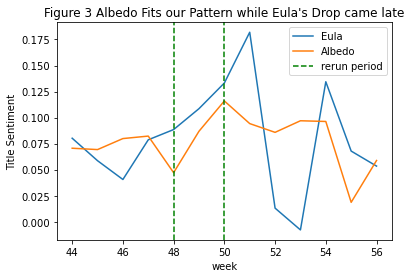

In [291]:
weeklychar.loc['Eula'].loc[44:56].stitle.plot(label = 'Eula')
weeklychar.loc['Albedo'].loc[44:56].stitle.plot(label = 'Albedo')
plt.axvline(x = 48, color = 'green', linestyle = 'dashed',label = 'rerun period')
plt.axvline(x = 50, color = 'green', linestyle = 'dashed')
plt.ylabel('Title Sentiment')
plt.legend()
plt.title("Figure 3 Albedo Fits our Pattern while Eula's Drop came a bit later")

With more character data and longer date range available, I noticed the sentiment pattern was more closed to "M" shape. In other words: Peak before rerun, drop, peak after/during rerun, drop. Hu Tao's case fits this description well. For now I hypotheze that the first peak-drop is caused by rerun confirmation: Mihoyo typically releases if a character is getting a rerun 2 weeks ahead.

Still, this project will focus on the pattern during/after rerun.

Text(0.5, 1.0, 'Figure 4 Hu Tao fits our pattern well')

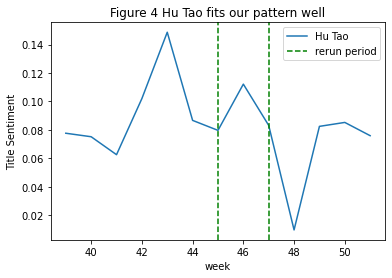

In [318]:
weeklychar.loc['Hu Tao'].loc[39:51].btitles.plot(label = 'Hu Tao')
plt.axvline(x = 45, color = 'green', linestyle = 'dashed',label = 'rerun period')
plt.axvline(x = 47, color = 'green', linestyle = 'dashed')
plt.ylabel('Title Sentiment')
plt.legend()
plt.title('Figure 4 Hu Tao fits our pattern well')

While Childe's sentiment pattern looks random, it is expected because Childe received his second rerun (shown below) very shortly after his first rerun. Far fewer player were looking to get him. According to sales statistics, Childe's 2nd rerun banner earned less than 1/3 of Hu Tao's rerun (cell above). Many fans of other characters were also upset that Childe got 2nd rerun banner even if their favorite character didn't even get a first one.

Text(0.5, 1.0, "Figure 5 Childe's 2nd rerun was controversial")

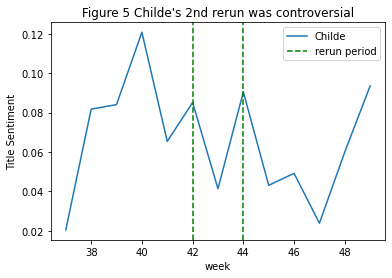

In [296]:
weeklychar.loc['Childe'].loc[37:49].stitle.plot(label = 'Childe')
plt.axvline(x = 42, color = 'green', linestyle = 'dashed',label = 'rerun period')
plt.axvline(x = 44, color = 'green', linestyle = 'dashed')
plt.ylabel('Title Sentiment')
plt.legend()
plt.title("Figure 5 Childe's 2nd rerun was controversial")

Text(0.5, 1.0, 'Picture 6 Klee fits our pattern well')

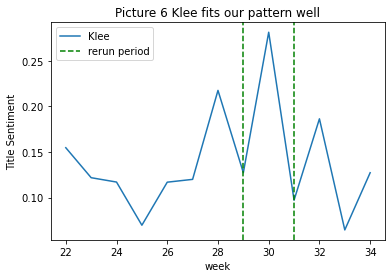

In [297]:
weeklychar.loc['Klee'].loc[22:34].stitle.plot(label = 'Klee')
plt.axvline(x = 29, color = 'green', linestyle = 'dashed',label = 'rerun period')
plt.axvline(x = 31, color = 'green', linestyle = 'dashed')
plt.ylabel('Title Sentiment')
plt.legend()
plt.title('Picture 6 Klee fits our pattern well')

Below are the same plot for two debut characters, for comparison. In Figure 7 I plotted brand-new character Itto's post sentiment. As can be seen, there isn't a signficant peak-drop pattern during or after rerun. Though sentiment dropped on week 53, the maginitude was small and the drop is more likely random turbulance, part of those in week 54-60.

In Figure 8 Kazuha experienced a sentiment pattern of 'drop-rise', opposite to rerun characters. 

The two new character examples shown here demonstrate that the peak-drop pattern was not universal for all character banners, but only for rerun banners.

Text(0.5, 1.0, "Figure 7 New Character Itto's First Release")

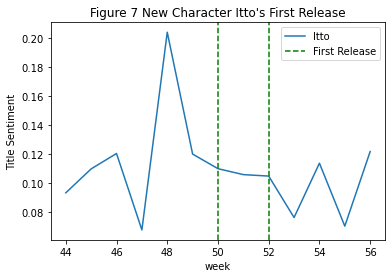

In [347]:
weeklychar.loc['Itto'].loc[44:56].stitle.plot(label = 'Itto')
plt.axvline(x = 50, color = 'green', linestyle = 'dashed',label = 'First Release')
plt.axvline(x = 52, color = 'green', linestyle = 'dashed')
plt.ylabel('Title Sentiment')
plt.legend()
plt.title("Figure 7 New Character Itto's First Release")

Text(0.5, 1.0, "Figure 8 New Character Kazuha's First Release")

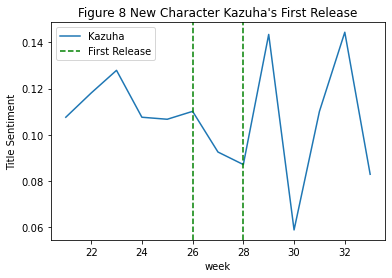

In [348]:
weeklychar.loc['Kazuha'].loc[21:33].stitle.plot(label = 'Kazuha')
plt.axvline(x = 26, color = 'green', linestyle = 'dashed',label = 'First Release')
plt.axvline(x = 28, color = 'green', linestyle = 'dashed')
plt.ylabel('Title Sentiment')
plt.legend()
plt.title("Figure 8 New Character Kazuha's First Release")

In [17]:
pos_tagged_title = data['title'].apply(nlp.pos_tag)
pos_tagged_body = data['selftext'].fillna(' ').apply(nlp.pos_tag)

In [11]:
data['selftext'] = data['selftext'].fillna(' ')

## Interpretation

### LDA Topics for Post Topic Shifting around Rerun

What caused such drop in sentiments? As time goes by, positive "Getting-Character-From-Wish" posts drop in volume while neutral "tactics disucssion" posts rise.

In early days (first week) of rerun, most players are doing lottery in the new wish Banner. Those over-thrilled at getting their desired character may then post to reddit to share their joy, causing a positive sentiment peak. As the rerun went on, the proportion of these getting-character posts dropped because most players have already finished their gambling. Instead, discussions of actual gameplay with their newly aquired character become more frequent, leading to sentiment becoming more calm/neutral. Besides, there may be more sad posts complaining not having enough currency to win the re-run character before he or she goes off shelf again, further lowering the average sentiment.

This hypothesis comes from my assignment 2 writeup about top lemmas analysis for Ganyu and Xiao. I'll now further illustrate this topic volume change by first building an LDA model, then identify the topics and plot their relative volume. 

In [ ]:
# Lemmanize Title + Body
data['fulltext'] = data.title + ' ' + data.selftext
starttime = time.time()
flemmas = data.fulltext.apply(nlp.get_lemmas) # I edited the nlp.py to add in some specific stop words
print("--- %s seconds ---" % (time.time() - starttime))
data['flemmas'] = flemmas
# Accidentally deleted output, this cell took 213 seconds to run.

In [15]:
data.to_pickle('data.pkl') #save for later use

In [137]:
# Build bigram and trigram models after get_lemmas to see if there's anything relevant
bigram = models.Phrases(flemmas, min_count=5)

# export trained model to use less memory:
bigram_mod = models.phrases.Phraser(bigram)

In [138]:
# make bigrams
def make_bigrams(texts):
    '''
    Make bigrams for words within a given document
    '''
    return [bigram_mod[doc] for doc in texts]

fbigrams = make_bigrams(flemmas)

In [139]:
# MUST RUN this cell in live session
# Initialize Series of lemmas as Gensim Dictionary for further processing
dictionary = corpora.Dictionary([i for i in fbigrams])

# Convert dictionary into bag of words format: list of (token_id, token_count) tuples
bow_corpus = [dictionary.doc2bow(text) for text in fbigrams]

As can be seen from the topic coherence plot, The socres remained relatively high for number of topics 1-14.T

I chose four topics for our model after some back-and-forth adjustments.

In [ ]:
#Computing topic coherence
model_list, coherence_values = music.compute_coherence_values(dictionary=dictionary,
                                                              corpus=bow_corpus, texts=fbigrams, start=2, limit=40, step=6)
plt.plot(range(2, 40, 6), coherence_values)  #very high values compared to pilot
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
#plt.savefig('coherence.png')
# Accidently cleared output, it takes very long to run another one. Read saved from cell below.

Text(0.5, 1.0, 'Figure 7 Topic Coherence')

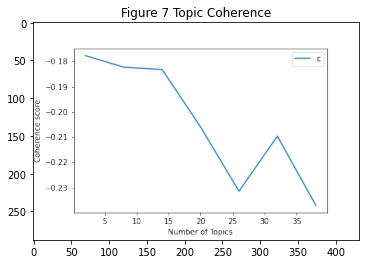

In [195]:
import matplotlib.image as mpimg
pic = mpimg.imread('coherence.png')
plt.imshow(pic)
plt.title('Figure 7 Topic Coherence')

In [140]:
starttime = time.time()
ldamodel = models.ldamulticore.LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, workers=8, passes=20, iterations=400)
ldamodel.save('lda5p20_i400.model')
print("--- %s seconds ---" % (time.time() - starttime))

--- 383.6815149784088 seconds ---


The pyLDAvis package provides a clear and detailed visulization of the topics. I'll interpret the topics found in the order shown in the picture.

Topic 1 (Biggest): Story.'Story' term frequency within topic 1 makes up for over 80% of its overall term frequency (red bar/light blue), so are the words "Inazuma" (fictional nation in game world), "vision" (a superpower), "Traveller" (the player, protagonist in game story but not gameplay). For some background, during our time period, Genshin Impact released its first major expansion featuring adventures in Inazuma nation. Story in this fictional nation revolves around "vision". 

Topic 2: Tactics. The high term frequency within/overall terms are: "Damage", "Use", "Team", "Attack","Shield","Enemy","Buff". Clearly, this is a topic about optimizing team, "buffing" each other to increase "attack", to deal most damage and maintain high survivalbility ("shield") against a given "enemy". This is the neutral topic we predict to rise in volume later in rerun as players find the character they pulled are hard to use or not as as strong as they expected.

Topic 3: Wish. The high term frequency within/overall terms are: "Get","Pull" (spending primogems in Wish),"Banner", and character names. This is a topic about pulling and getting characters from the game's wish system. This is the happy topic we predict to have very high presence in the beginning of rerun but then falls in volume.

Topic 4: Arts and Fan-creations. Highly relevant terms are "http"(link to the content), "make","drew" and character names. This is the topic about artworks for their favorite characters.

In [141]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(ldamodel, bow_corpus, dictionary)
p

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.063062 -0.058471       1        1  31.479868
0     -0.133367  0.094931       2        1  30.136465
1     -0.098229 -0.084317       3        1  26.036154
3      0.168534  0.047857       4        1  12.347513, topic_info=        Term          Freq         Total Category  logprob  loglift
849   damage  25261.000000  25261.000000  Default  30.0000  30.0000
12    banner  17780.000000  17780.000000  Default  29.0000  29.0000
59      pull  18554.000000  18554.000000  Default  28.0000  28.0000
0         ''  29207.000000  29207.000000  Default  27.0000  27.0000
1705   --_--  16697.000000  16697.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
245    could   1890.246353  18814.525802   Topic4  -5.9414  -0.2062
75      time   1986.809854  28311.793733   Topic4  -5.8916  -0.5650
242    ayaka   1832.150715  16868.747824   Topic4  -5.9726  -0.1283
73     think   1859.366703  24990.078366   Topic4  -5.9579  -0.5065
765        ’   1934.773432  63397.884800   Topic4  -5.9181  -1.3977

[399 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
0          1  0.324540         ''
0          2  0.155302         ''
0          3  0.128426         ''
0          4  0.391748         ''
42159      4  0.995992  ''_norman
...      ...       ...        ...
765        1  0.608900          ’
765        2  0.116739          ’
765        3  0.243841          ’
765        4  0.030522          ’
35670      3  0.988109          🌸

[833 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

### Using LDA Model to Classify posts into Topics

In [143]:
#printing topics
topics = ldamodel.print_topics(num_words=15)
topics
# NOT in the same order as ldavis
# 0: tactics
# 1: wish
# 2: story
# 3: artwork

[(0,
  '0.017*"character" + 0.014*"damage" + 0.012*"team" + 0.009*"use" + 0.008*"like" + 0.008*"burst" + 0.007*"make" + 0.006*"dp" + 0.006*"well" + 0.006*"also" + 0.006*"would" + 0.006*"electro" + 0.005*"good" + 0.005*"raiden" + 0.005*"need"'),
 (1,
  '0.023*"get" + 0.021*"character" + 0.011*"pull" + 0.011*"banner" + 0.011*"like" + 0.010*"game" + 0.010*"’" + 0.009*"want" + 0.008*"ganyu" + 0.007*"time" + 0.006*"one" + 0.006*"zhongli" + 0.006*"play" + 0.006*"would" + 0.006*"hu_tao"'),
 (2,
  '0.021*"’" + 0.010*"like" + 0.009*"--_--" + 0.009*"character" + 0.008*"people" + 0.008*"would" + 0.007*"get" + 0.007*"one" + 0.007*"story" + 0.006*"inazuma" + 0.006*"know" + 0.006*"see" + 0.006*"go" + 0.006*"make" + 0.006*"even"'),
 (3,
  '0.016*"\'\'" + 0.011*"http" + 0.007*"raiden_shogun" + 0.005*"one" + 0.005*"make" + 0.005*"like" + 0.005*"know" + 0.005*"also" + 0.005*"gt" + 0.005*"venti" + 0.004*"klee" + 0.004*"zhongli" + 0.004*"yae_miko" + 0.004*"character" + 0.004*"name"')]

In the short examples below, we could see our model did a good job classifying these two posts. 

Its accuracy in a larger scale, however, requires a lot human classification to test as Reddit doesn't provide post label/flair data.

In [152]:
ldamodel[bow_corpus[0]] # Predicting topic for the first post
# Topic 1 with 84% probabilty, topic 1 is wish.

[(0, 0.053995468), (1, 0.84369177), (3, 0.09975078)]

In [156]:
data.fulltext[0] # Certainly a "Wish" post. The author described how he got Childe mistakenly but ended up liking him.

'What characters became one of your favorites after regretting getting them (or accidentally pulling them)? Basically The opposite of this question: https://www.reddit.com/r/Genshin_Impact/comments/p4u2mm/what_characters_do_you_regret_intentionally/?utm_medium=android_app&amp;utm_source=share\n\nI ask because I was pulling for ning C1 on first childe banner ( at the time people told me it was "required for dps because aoe"). I ended up pulling 79 pulls and no ningguang and childe came on the last pull (remember no soft pity numbers were widely known then).\n\nI had huge regret. I was saving for first waifu banner and really regretted it. But damn after 1 year I have to say childe has a very fun gameplay. And especially with a certain archon on the way I believe they will go good together! \n\nI regretted pulling him unintentionally and my whole day was ruined and I felt like quitting lmao. but am so happy with his presence and playstyle today! Just amazing dual wielding hydro casual ri

In [157]:
print(ldamodel[bow_corpus[1]] ) #Story 55.8%. Not very confident but correct
print(data.fulltext[1]) # The post is about being upset about cutscenes in Baal fight (a Boss fight in story). It doesn't fit very well in our 4 topics,
                        # but story is the one most close one. This is a "feature request".

[(1, 0.4263887), (2, 0.5582361)]
Please Let us skip cutscenes Fighting Baal is 200% harder every time you have to wait through a cutscene. It's infuriating. Getting a call back to the early 2000s when cutscenes tended to be unskipable in 2021 is frankly sloppy. 

I don't know what else to say. It's a widespread basic feature for years in most games. Childe had this problem too.


In [170]:
#Classifying all posts
pred = []
prob = []
for d in bow_corpus:
    pred.append(max(ldamodel[d],key=lambda x: x[1])[0])
    prob.append(max(ldamodel[d],key=lambda x: x[1])[1])
data['topic'] = pred
data['topicprob'] = prob

Text(0.5, 1.0, 'Figure 8 Average Sentiment by Topic')

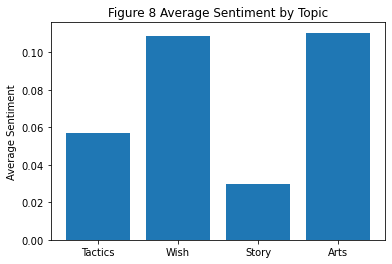

In [204]:
# Plot post sentiment by topic
topicnames = ['Tactics','Wish','Story','Arts']
plt.bar(topicnames,data.groupby('topic').stitle.mean())
plt.ylabel('Average Sentiment')
plt.title('Figure 8 Average Sentiment by Topic')

As can be seen from Figure 9 below, for every rerun character, "Wish" topic (light red) is more positive than "Tactics" (green).

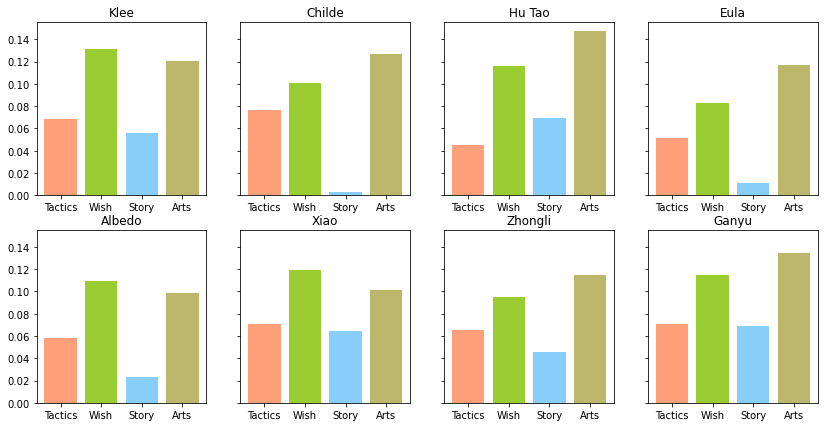

In [230]:
# Plot post sentiment by topic and by character
rrchars = ['Klee','Childe','Hu Tao','Eula','Albedo','Xiao','Zhongli','Ganyu']
topicsentiments = data[data.character.isin(rrchars)].groupby(['character','topic']).stitle.mean()
fig, axs = plt.subplots(nrows=2, ncols=4, figsize = (14,7), sharey = True)
for char, ax in zip(rrchars, axs.ravel()):  # https://engineeringfordatascience.com/posts/matplotlib_subplots/
    
    # filter df for ticker and plot on specified axes
    ax.bar(topicnames, topicsentiments.loc[char],color = ['lightsalmon','yellowgreen','lightskyblue','darkkhaki'])
    ax.set_title(char)

plt.show()

Without going into specific character, we can see from the table below that:
- About characters out of rerun, "Wish" has 45.6% frequency, while "Tactics" has 19.1%. 
We have Wish:Tactics = 2.38
- About characters being rerun, "Wish" rises to 57.7% frequency, while "Tactics" drops a third to 11.3%. The other 2 topics, in comparison, only drops slightly in frequency. We have Wish:Tactics = 5.10

This lends support to our hypothesis that the shift in topics caused the peak-drop in post sentiments.

We'll use Wish/Tactics ratio to track the shift in topics around rerun. (number of wish posts/ number of tactics posts)

In [339]:
# Topic Frequency by rerun status
rr = data[data.character.isin(rrchars)]
rr['onrerun'] = rr.rrstatus == 'on'
topicdict = dict(zip([0,1,2,3],topicnames))
rr.topic.replace(topicdict, inplace = True)
table = pd.DataFrame(rr.groupby('onrerun').topic.value_counts(normalize = True, sort = False))
table.columns = ['Percentage']
table

Percentage
onrerun topic              
False   Arts       0.253915
        Story      0.098751
        Tactics    0.191489
        Wish       0.455845
True    Arts       0.235403
        Story      0.074831
        Tactics    0.112784
        Wish       0.576982

In [340]:
# Weekly Wish/Tactics ratio by time 
wishes = rr[rr.topic == 'Wish']
tactics = rr[rr.topic == 'Tactics']
wtratio = wishes.groupby([rr.character,rr.created_utc.dt.isocalendar().week.apply(adjust_week)]).topic.count()/ \
tactics.groupby([rr.character,rr.created_utc.dt.isocalendar().week.apply(adjust_week)]).topic.count()
# How do I do this more elegantly?
weeklychar['wtratio'] = wtratio

media_only  num_comments       score     stext    stitle  \
character week                                                             
Albedo    20           0.0     32.790698    1.000000  0.244751  0.091516   
          21           0.0     23.358974    0.987179  0.211436  0.090969   
          22           0.0     19.172414    1.155172  0.107733  0.051029   
          23           0.0     17.800000    2.800000  0.221465  0.079595   
          24           0.0     40.162791  355.038760  0.133686  0.099264   

                  btexts   btitles   wtratio  
character week                                
Albedo    20    0.081928  0.125476  4.000000  
          21    0.038253  0.097179  1.875000  
          22    0.058717  0.033142  1.416667  
          23    0.046735  0.098176  1.333333  
          24    0.034136  0.073362  2.500000

Take Xiao for example, in Figure 10 we can see an increase in wish/tactics ratio when the rerun starts, meaning an increase in Wish posts (that are usually positive). Then after the rerun ends, post topic shifts towards tactics that are usually neutral, and the sentiment drops accordingly.

Text(0.5, 1.0, 'Figure 10 Character Xiao Title Sentiment and W/T ratio')

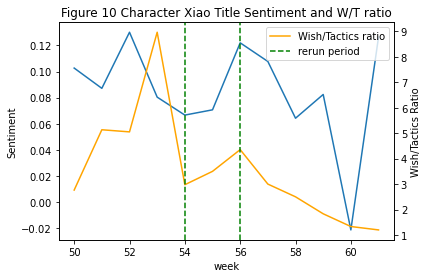

In [329]:
# Example with Xiao
weeklychar.loc['Xiao'].loc[50:].btitles.plot(label = 'Sentiment', ylabel = 'Sentiment')
ax2 = plt.twinx()
weeklychar.loc['Xiao'].loc[50:].wtratio.plot(label = 'Wish/Tactics ratio', ax = ax2, color = 'orange')
plt.axvline(x = 54, color = 'green', linestyle = 'dashed',label = 'rerun period')
plt.axvline(x = 56, color = 'green', linestyle = 'dashed')
ax2.set_ylabel('Wish/Tactics Ratio')
plt.legend()
plt.title('Figure 10 Character Xiao Title Sentiment and W/T ratio')

Figure 11 is another example with Zhongli. Although his post sentiments didn't have a obvious peak, the W/T ratio fits our expectations well, and sentiment goes down accordingly. 

We can see that randomness still plays a very big part and the two lines don't always align well. I consider this acceptable as W/T ratio for each week can have large variance, as there can often be <10 tactical posts about a character, and the post sentiments tend to vary a lot. For futher computational interpretations, it would be helpful to include Time-series methods for character sentiment trends.

Text(0.5, 1.0, 'Figure 11 Character Zhongli Title Sentiment and W/T ratio')

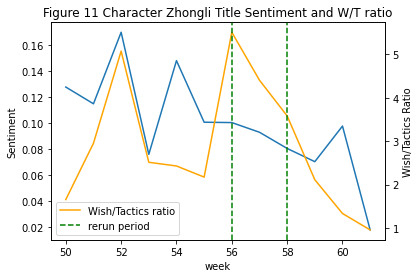

In [333]:
# Example with Zhongli
weeklychar.loc['Zhongli'].loc[50:].stitle.plot(label = 'Sentiment', ylabel = 'Sentiment')
ax2 = plt.twinx()
weeklychar.loc['Zhongli'].loc[50:].wtratio.plot(label = 'Wish/Tactics ratio', ax = ax2, color = 'orange')
plt.axvline(x = 56, color = 'green', linestyle = 'dashed',label = 'rerun period')
plt.axvline(x = 58, color = 'green', linestyle = 'dashed')
ax2.set_ylabel('Wish/Tactics Ratio')
plt.legend()
plt.title('Figure 11 Character Zhongli Title Sentiment and W/T ratio')

## Social Science Interpretations

As we talked about in the introduction, Wishing for a new character is a big investment for most players. (50 days or $150) Acquiring a character often means giving up multiple new or rerun multiple characters. Most players, myself included, think twice about investing in a character.

For whether or not to acquire a NEW character, players consider more of their own intuitive feelings, and make a choice based on whatever information available. However, as to whether to obtain a rerun characters, because they have not played the character while others did, the determining factor becomes other veteran players' evaluations, instead of themselves. This is especially influential for players who frequently visit the Genshin Impact Subreddit, as they are more frequently exposed to such opinions. When they listened to other people's suggestions to wish for rerun characters, they often end up realizing that the characters were not as powerful as they expected, resulting in negative emotions, and posting on Reddit to ask "How do I play him/her"?

Relying on veteran's opinions for rerun Wish is very similar to reading movie reviews to decide whether to watch a movie, because the veterans or reviewers, maybe, have a better taste. According to Bourdieu (1984), "good taste" is a social construct acquired by birth, social class, or nurtured. In Genshin Impact, a player must start the game before the character's debut (birth), own the character (economic), and have some experience with him/her ("education")to be able to offer wishing advice. In other words, "character taste" belongs to the upper "veteran" class, not the "novice/casual player". Blewitt (1993) proposed that "good taste" is deeply institutionalized, so for the taste of Genshin Impact's characters. The "upper class" that owns this character tends to have a biased taste for this character, as everyone wants to justify their investment. Furthermore, quite a few content creators (mostly on Youtube) are directly sponsored by Mihoyo (the game maker), and thus prefer to advocate wishing for rerun character. This is similar to the movie critics directly receiving money from makers of movie they critique, yet Genshin content makers even having a bigger say on "character taste" than movie critics for movies.

Video game researchers have also recognized the role of community influence in promoting and justifying spending (Chung, 2011, Brückner et al., 2019). Britt (2019) conducted a more rigorous analysis of Reddit post topics and found that in another similar game (Fate: Grand Order), with the maturity of the community, the discussion topics changed from shallow to deep, marking the "taste" of the game developing. 

Besides tastes, another possible explanation is the "Greener Grass Syndrome", or social comparison theory (Buunk and Thomas, 2001): Characters owned by other players always seem to look better than yours, though that may not be the case. This motivates players to go after replica characters that others have. Alfasi (2019) pointed out that "Social comparison that takes place online is unique in the sense that it evokes almost exclusively upward comparison", and it is obviously applicable to online games: players can show off their powerful characters in co-op modes or post your character's gameplay experience on Reddit. Research points out that upward comparisons can lead to negative emotional outcomes (Lee, 2014), and such negative feelings may lead to irrational spending behaviors by players, which later become Reddit posts: "How do I play him?"

## Conclusions

In this project, we asked the question: Why does sentiment of posts for rerun characters on Genshin Impact subreddit have a "peak-drop" pattern? We identified this pattern by plotting the sentiments of each character that received a rerun in the past 10 months and compared them to newly released characters. 

We raised a hypothesis that the peak-drop post sentiment patterns are caused by post topic shifts around rerun times. When rerun starts, the happy 'Wish' topic rise in volume, then calm 'Tactic' posts becomes more common as players actually try their new characters.

We succeeded in using LDA to identify the mentioned topics and the average sentiment of each topic agrees to our expectations ('Wish' being happier than 'tactics'). The overall topic volume by rerun status also supports our hypothesis, as the Wish/Tactics ratio on rerun characters is 214% of non-rerun characters. We can say our hypothesis is supported in the general.

However, this doesn't always apply to a specific characters. We found there's still much randomness in Wish/Tactics ratio and post title sentiments, probably because of the small cell size. Further steps may include utilizing time-series analysis.

We found two appropriate social science explanations for this pattern. One is institutionalized "character taste" driving players into wishing for rerun characters instead of following their own judgements. The other one is social comparison theory: Upwards online social comparison is also prominent in Genshin Impact game, and the resulting negative emotions leads to irrational spending. The application of both theories is quite innovative, as far as I know. As Gacha games (the game genre featuring paid randomized rewards) becoming mainstream, this project could be a useful reference for analyzing player behaviors.

## References


Alfasi, Yitshak. "The grass is always greener on my Friends' profiles: The effect of Facebook social comparison on state self-esteem and depression." Personality and Individual Differences 147 (2019): 111-117.

Blewitt, John. "Film, ideology and Bourdieu's critique of public taste." The British Journal of Aesthetics 33, no. 4 (1993): 367-373.

Bourdieu, P. "Distinction: A social critique of the judgment of taste, translated by R. Nice. Cambridge, MA: Harvard University Press." (1984).

Britt, Brian C., and Rebecca K. Britt. "From waifus to whales: The evolution of discourse in a mobile game-based competitive community of practice." Mobile Media & Communication 9, no. 1 (2021): 3-29.

Brückner, Stefan, Shuichi Kurabayashi, Yukiko Sato, and Ikumi Waragai. "Analyzing random reward system mechanics and social perception." In Proceedings of DiGRA. 2019.

Buunk, Bram P., and Thomas Mussweiler. "New directions in social comparison research." European Journal of Social Psychology 31, no. 5 (2001): 467-475.

Chung, Yuen-Ki. "Saving for Merlin: Consumer Motivation in Gacha-based Mobile Gaming." (2019).

Lee, Sang Yup. "How do people compare themselves with others on social network sites?: The case of Facebook." Computers in human behavior 32 (2014): 253-260.